In [36]:
import numpy as np
import importlib.util
import ryan_ga_verify as ryan
import sim_combiner
import bid_functions
import verify_bid_funcs
import matplotlib.pyplot as plt

In [6]:
max_uncertainty = 1000
value_bounds = (500, 9500)
n_mids = 1001
n_uncs = 101
mids = np.linspace(value_bounds[0] - max_uncertainty/2, value_bounds[1] + max_uncertainty/2, n_mids)
uncs = np.linspace(0, max_uncertainty, n_uncs)
bids = np.zeros((4, n_mids, n_uncs))
nash_bidders = ryan.create_nash_bidders(signal_counts, max_uncertainty, mids)
n_signals = nash_bidders.signals()

n_samples = 1000
sample_rel_mids, sample_uncs = verify_bid_funcs.sample_rel_sufficient_stats(n_signals, n_samples, max_uncertainty)
bids, bid_profs = zip(*map(lambda m: expected_profit_m(m, mids, uncs, sample_rel_mids, sample_uncs, nash_bidders, n_samples, max_uncertainty, value_bounds), range(n_mids)))


0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
210.0
220.0
230.0
240.0
250.0
260.0
270.0
280.0
290.0
300.0
310.0
320.0
330.0
340.0
350.0
360.0
370.0
380.0
390.0
400.0
410.0
420.0
430.0
440.0
450.0
460.0
470.0
480.0
490.0
500.0
510.0
520.0
530.0
540.0
550.0
560.0
570.0
580.0
590.0
600.0
610.0
620.0
630.0
640.0
650.0
660.0
670.0
680.0
690.0
700.0
710.0
720.0
730.0
740.0
750.0
760.0
770.0
780.0
790.0
800.0
810.0
820.0
830.0
840.0
850.0
860.0
870.0
880.0
890.0
900.0
910.0
920.0
930.0
940.0
950.0
960.0
970.0
980.0
990.0
1000.0
1010.0
1020.0
1030.0
1040.0
1050.0
1060.0
1070.0
1080.0
1090.0
1100.0
1110.0
1120.0
1130.0
1140.0
1150.0
1160.0
1170.0
1180.0
1190.0
1200.0
1210.0
1220.0
1230.0
1240.0
1250.0
1260.0
1270.0
1280.0
1290.0
1300.0
1310.0
1320.0
1330.0
1340.0
1350.0
1360.0
1370.0
1380.0
1390.0
1400.0
1410.0
1420.0
1430.0
1440.0
1450.0
1460.0
1470.0
1480.0
1490.0
1500.0
1510.0
1520.0
1530.0
1540.0
1550.0
1560.0
1570.0
1580.

In [2]:
import csv

def read_br_file(filename):
    bidders = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            signals = int(row[0])
            midpoints = np.array(next(reader),dtype=np.float64)
            if signals == 1:
                uncertainty = next(reader)
                bids = np.array(next(reader), dtype=np.float64)
                bidders.append(bid_functions.SingleSignalBidder(signals, midpoints, uncertainty, bids))
            else:
                uncertainties = np.array(next(reader), dtype=np.float64)
                bids = []
                # for _ in uncertainties:
                #     bids.append(np.array(next(reader), dtype=np.float64))
                # bids = np.array(bids)
                for _ in midpoints:
                    bids.append(np.array(next(reader), dtype=np.float64))
                bids = np.array(bids)
                bids = np.transpose(bids)
                bidders.append(bid_functions.Bidder(signals, midpoints, uncertainties, bids))
    return bid_functions.BidderSet(bidders)

In [3]:
signal_count = (3,3,4,4)
max_uncertainty = 1000
value_bounds = (500, 9500)

uncs = np.array([100, 500, 900])

n_mids = 1001
mids = np.linspace(value_bounds[0] - max_uncertainty/2, value_bounds[1] + max_uncertainty/2, n_mids)

file_name = f'F:/Dropbox (Chapman)/Costly Signals/sealed_bid_model/br_bids_{"".join([str(i) for i in signal_count])}.csv'
bidders_set = read_br_file(file_name)



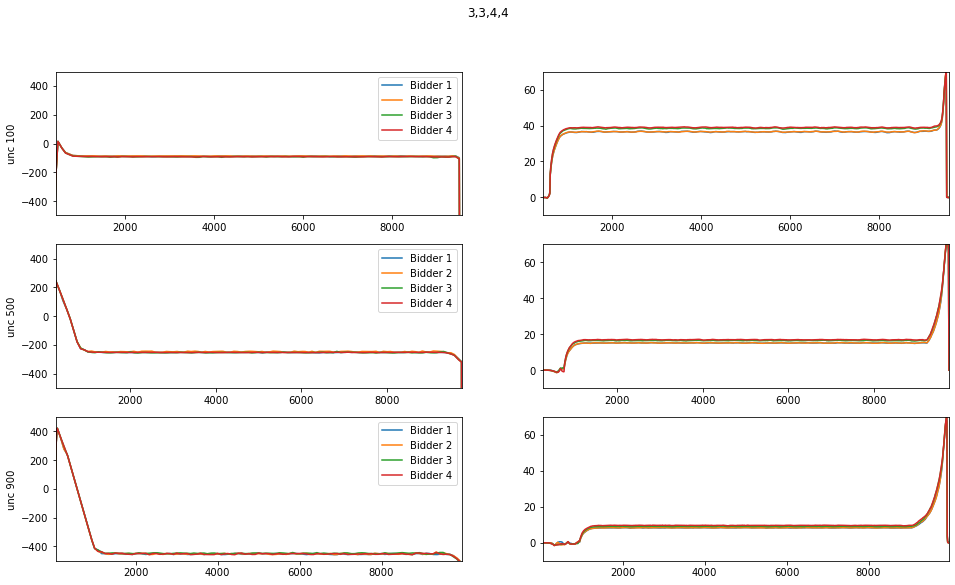

In [6]:
bids, bid_profs = ryan.expected_profits(mids, uncs, bidders_set, max_uncertainty, value_bounds, 10000)
ryan.plot_exp_profit(mids, uncs, bids, bid_profs, signal_count)

In [65]:
x=verify_bid_funcs.convert_grid_bids(bidders_set, [[1000,2000,5000,7000,8000]]*4, [np.repeat([[100],[500],[800]],5,axis=1)]*4)

In [66]:
x

array([[[ 914., 1913., 4913., 6910., 7912.],
        [ 753., 1748., 4748., 6748., 7748.],
        [ 631., 1601., 4603., 6600., 7606.]],

       [[ 913., 1913., 4913., 6914., 7913.],
        [ 755., 1753., 4752., 6755., 7753.],
        [ 626., 1599., 4598., 6600., 7600.]],

       [[ 910., 1909., 4909., 6908., 7909.],
        [ 752., 1752., 4750., 6750., 7747.],
        [ 627., 1600., 4602., 6601., 7603.]],

       [[ 910., 1909., 4908., 6908., 7909.],
        [ 754., 1748., 4748., 6748., 7748.],
        [ 622., 1594., 4604., 6606., 7594.]]])

In [67]:
y=np.mean(x[np.array([[1,2,3],[0,2,3],[0,1,3],[0,1,2]])],axis=1)

In [79]:
np.sum(np.sum((x-y)**2/3,axis=2),axis=1)

array([52.14814815, 61.92592593, 20.74074074, 85.62962963])

In [94]:
((x-y)**2/3).reshape((4,15)).sum(axis=1)

array([52.14814815, 61.92592593, 20.74074074, 85.62962963])

In [4]:
file_name = f'F:/Dropbox (Chapman)/Costly Signals/sealed_bid_model/bid_funcs_{"".join([str(i) for i in (3,3,4,4)])}.csv'
bidders_set = bid_functions.read_file(file_name)


In [16]:
sample_rel_mids, sample_uncs = verify_bid_funcs.sample_rel_sufficient_stats(bidders_set.signals(), 100, 1000)
bids, bid_profs, opt_bids, opt_profs = verify_bid_funcs.calc_opts_m(3, bidders_set[0].midpoints, bidders_set[0].uncertainties, sample_rel_mids, sample_uncs, bidders_set, 100)

500.0


In [17]:
bids_o, bid_profs_o, opt_bids_o, opt_profs_o = verify_bid_funcs.calc_opts_iterative_m(3, sample_rel_mids, sample_uncs, bidders_set, 100)

500.0


In [18]:
bids-bids_o

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

In [26]:
bids, bid_profs, opt_bids, opt_profs = ryan.best_responses(bidders_set[0].midpoints, bidders_set[0].uncertainties, bidders_set, 1000, (500,9500))
#bids_o, bid_profs_o, opt_bids_o, opt_profs_o = ryan.best_responses_iterative(bidders_set[0].midpoints, bidders_set[0].uncertainties, bidders_set, 1000, (500,9500))

In [33]:
bids[31]-bids_o[31]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

In [34]:
bidders_set[0].uncertainties

array([   0.  ,   16.67,   33.33,   50.  ,   66.67,   83.33,  100.  ,
        116.67,  133.33,  150.  ,  166.67,  183.33,  200.  ,  216.67,
        233.33,  250.  ,  266.67,  283.33,  300.  ,  316.67,  333.33,
        350.  ,  366.67,  383.33,  400.  ,  416.67,  433.33,  450.  ,
        466.67,  483.33,  500.  ,  516.67,  533.33,  550.  ,  566.67,
        583.33,  600.  ,  616.67,  633.33,  650.  ,  666.67,  683.33,
        700.  ,  716.67,  733.33,  750.  ,  766.67,  783.33,  800.  ,
        816.67,  833.33,  850.  ,  866.67,  883.33,  900.  ,  916.67,
        933.33,  950.  ,  966.67,  983.33, 1000.  ])

In [3]:

n_samples = 1000000
sample_rel_mids, sample_uncs = verify_bid_funcs.sample_rel_sufficient_stats((3,3,4,4), n_samples, 1000)

def sample_bids(sample_rel_mids, sample_uncs):
    sample_trues = 500 + (9500-500)*np.linspace(0,1,sample_rel_mids.shape[1])
    sample_mids = sample_rel_mids + sample_trues
    sample_bids = verify_bid_funcs.convert_grid_bids(bidders_set, sample_mids, sample_uncs)
    return sample_bids

all_sample_bids = [sample_bids(sample_rel_mids, sample_uncs) for m in np.linspace(0,10000,61)]

NameError: name 'bidders_set' is not defined

In [21]:
import sys
sys.getsizeof(np.array(all_sample_bids))

1952000128

In [24]:
[[i for i in range(4) if i != j] for j in range(4)]

[[1, 2, 3], [0, 2, 3], [0, 1, 3], [0, 1, 2]]

In [26]:
sample_bids = verify_bid_funcs.convert_grid_bids(bidders_set, [[2000,5000,8000],[2000,5000,8000],[2000,5000,8000],[2000,5000,8000]], [[100,500,900],[100,500,900],[100,500,900],[100,500,900]])

In [32]:
np.max(sample_bids[np.array([0,2,3])],axis=0)

array([1863.05, 4743.34, 7548.5 ])

In [33]:
np.zeros(4)

array([0., 0., 0., 0.])

In [5]:
mid = 5000
unc = 800
value_bounds = (500, 9500)

n_samples = 100000
sample_rel_mids, sample_uncs = verify_bid_funcs.sample_rel_sufficient_stats((3,3,4,4), n_samples, 1000)

lower = max(mid - unc/2, value_bounds[0])
upper = min(mid + unc/2, value_bounds[1])
# Since true values are uniformly distributed, just make an evenly spread out array of them.
sample_trues = lower + (upper-lower)*np.linspace(0,1,n_samples)
sample_mids = sample_rel_mids + sample_trues
sample_bids = verify_bid_funcs.convert_grid_bids(bidders_set, sample_mids, sample_uncs)
potential_bids = np.arange(max(value_bounds[0],mid-800), min(mid+600, value_bounds[1]))

selection = np.array([i for i in range(4) if i != 1])
other_highest = np.max(sample_bids[selection], axis=0)

In [28]:
avgs = [np.mean((other_highest < bid)*(sample_trues-bid)) for bid in potential_bids]

In [18]:
%%timeit
pot = potential_bids.reshape(len(potential_bids),1)
(other_highest < pot) * (sample_trues - pot)

2.58 s ± 40 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%timeit sample_trues < potential_bids.reshape(len(potential_bids),1)

255 ms ± 25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
np.array([[[1,2,3,4],[5,6,7,8]],[[9,10,11,12],[13,14,15,16]]]).sum(axis=0).sum(axis=1)

array([52, 84])

In [25]:
import numba as nb

@nb.njit(fastmath=True, parallel=True)
def avg_prof_loop(other_highest, sample_trues, potential_bids):
    other_highest = np.ascontiguousarray(other_highest)
    sample_trues = np.ascontiguousarray(sample_trues)

    n = potential_bids.shape[0]
    s = other_highest.shape[0]
    avg = np.empty(n, dtype=other_highest.dtype)
    for i in nb.prange(n):
        t = 0
        for j in nb.prange(s):
            t += (other_highest[j] < potential_bids[i]) * (sample_trues[j] - potential_bids[i])
        avg[i] = t / s;
    return avg

@nb.njit(fastmath=True)
def avg_prof_loop2(other_highest, sample_trues, potential_bids):
    other_highest = np.ascontiguousarray(other_highest)
    sample_trues = np.ascontiguousarray(sample_trues)

    n = potential_bids.shape[0]
    s = other_highest.shape[0]
    avg = np.empty(n, dtype=other_highest.dtype)
    maxp = -1000.0
    optb = 0
    for i in range(n):
        t = 0
        for j in range(s):
            t += (other_highest[j] < potential_bids[i]) * (sample_trues[j] - potential_bids[i])
        avg = t / s;
        if avg > maxp:
            optb = potential_bids[i]
            maxp = avg
    return optb

@nb.njit(fastmath=True)
def avg_prof_loop3(other_highest, sample_trues, potential_bids):
    other_highest = np.ascontiguousarray(other_highest)
    sample_trues = np.ascontiguousarray(sample_trues)

    n = potential_bids.shape[0]
    s = other_highest.shape[0]
    avg = np.empty(n, dtype=other_highest.dtype)
    for i in range(n):
        t = 0
        for j in range(s):
            t += (other_highest[j] < potential_bids[i]) * (sample_trues[j] - potential_bids[i])
        avg[i] = t / s;
    return avg

@nb.njit(fastmath=True)
def avg_prof_loop4(other_highest, sample_trues, potential_bids):
    other_highest = np.ascontiguousarray(other_highest.reshape(other_highest.shape[0],1))
    sample_trues = np.ascontiguousarray(sample_trues.reshape(sample_trues.shape[0], 1))
    potential_bids = np.ascontiguousarray(potential_bids)

    return np.mean(((other_highest < potential_bids) * (sample_trues - potential_bids)))


In [26]:
%timeit avgs = [np.mean((other_highest < bid)*(sample_trues-bid)) for bid in potential_bids]
%timeit avgs1 = avg_prof_loop(other_highest, sample_trues, potential_bids)
%timeit avgs2 = avg_prof_loop2(other_highest, sample_trues, potential_bids)
%timeit avgs3 = avg_prof_loop3(other_highest, sample_trues, potential_bids)

%timeit avgs4 = avg_prof_loop4(other_highest, sample_trues, potential_bids)

276 ms ± 4.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.72 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
41.2 ms ± 2.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
40.7 ms ± 540 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
601 ms ± 7.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
avgs2 = avg_prof_loop(other_highest, sample_trues, potential_bids)
avgs3 = avg_prof_loop2(other_highest, sample_trues, potential_bids)

In [51]:
np.max(np.array(avgs)-np.array(avgs2))

6.394884621840902e-14

In [58]:
%timeit potential_bids[np.argmax(avg_prof_loop(other_highest, sample_trues, potential_bids))]

7.63 ms ± 223 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
%timeit avg_prof_loop2(other_highest, sample_trues, potential_bids)

20.9 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%timeit potential_bids.reshape((len(potential_bids), 1)) > other_highest

153 ms ± 520 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
%timeit other_highest.reshape((len(other_highest), 1)) < potential_bids

118 ms ± 487 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
np.array([2,3,4,1]).argsort()

array([3, 0, 1, 2], dtype=int64)

In [24]:
np.argsort(np.array([1000, 1, 2, 1000, 3, 4]))

array([1, 2, 4, 5, 0, 3], dtype=int64)

In [25]:
x = (2,3,5,5)
"_".join([str(i) for i in x])

'2_3_5_5'

In [5]:
from pathos.multiprocessing import ProcessingPool as Pool
from celluloid import Camera

In [53]:
n_samples = 1000000
signal_count = (2,2,2,2)
max_uncertainty = 1000
value_bounds = (500, 9500)
n_bidders = len(signal_count)

uncs = np.array([100,500,900])

bidder_iters = ryan.read_file("\\br_25_thresh_2.0_reps_100000_2_2_2_2_241_mids\\br_25_thresh_2.0_reps_100000_2_2_2_2_241_mids.csv", 4)

mids = bidder_iters.bid_sets[0][0].midpoints

ga_bidders = bid_functions.read_file(f'F:/Dropbox (Chapman)/Costly Signals/sealed_bid_model/bid_funcs_{"".join([str(i) for i in signal_count])}.csv')
bidder_iters.bid_sets.insert(0, ga_bidders)

sample_rel_mids, sample_uncs = verify_bid_funcs.sample_rel_sufficient_stats(signal_count, n_samples, max_uncertainty)

fig, axs = plt.subplots(len(uncs), 2)
fig.set_size_inches(16,10)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
colors = ['blue','green','yellow','orange']
camera = Camera(fig)

iteration = 1
for bidder_set in list(bidder_iters):
    bids, bid_profs = zip(*map(lambda m: verify_bid_funcs.calc_exp_prof_m(m, mids, uncs, sample_rel_mids, sample_uncs, bidder_set, n_samples, max_uncertainty, value_bounds), range(len(mids))))
    bids = np.array(bids)
    bid_profs = np.array(bid_profs)

    for u in range(len(uncs)):
        ax_bid = axs[u][0]
        ax_bid.set_ylim(-600, 300)
        ax_prof = axs[u][1]
        for bidder_idx in range(4):
            ax_bid.plot(mids, bids[:,bidder_idx, u] - mids, color=colors[bidder_idx])
            ax_prof.plot(mids, bid_profs[:,bidder_idx, u], color=colors[bidder_idx])

    axs[0][0].text(0.5, 1.01, f'{iteration}/{len(bidder_iters.bid_sets)}', transform=axs[0][0].transAxes)
    camera.snap()
    iteration += 1
    
    # for u in range(3):
    #     for i in range(2):
    #         axs[u][i].clear()

anim = camera.animate()
plt.close()


0.0
41.666666666666664
83.33333333333333
125.0
166.66666666666666
208.33333333333331
250.0
291.66666666666663
333.3333333333333
375.0
416.66666666666663
458.3333333333333
500.0
541.6666666666666
583.3333333333333
625.0
666.6666666666666
708.3333333333333
750.0
791.6666666666666
833.3333333333333
875.0
916.6666666666666
958.3333333333333
1000.0
1041.6666666666665
1083.3333333333333
1125.0
1166.6666666666665
1208.3333333333333
1250.0
1291.6666666666665
1333.3333333333333
1375.0
1416.6666666666665
1458.3333333333333
1500.0
1541.6666666666665
1583.3333333333333
1625.0
1666.6666666666665
1708.3333333333333
1750.0
1791.6666666666665
1833.3333333333333
1875.0
1916.6666666666665
1958.3333333333333
2000.0
2041.6666666666665
2083.333333333333
2125.0
2166.6666666666665
2208.333333333333
2250.0
2291.6666666666665
2333.333333333333
2375.0
2416.6666666666665
2458.333333333333
2500.0
2541.6666666666665
2583.333333333333
2625.0
2666.6666666666665
2708.333333333333
2750.0
2791.6666666666665
2833.333333

In [ ]:
from matplotlib.animation import PillowWriter
anim.save("br_animation_241mids.gif", dpi=300, writer=PillowWriter(fps=1))

In [11]:
bidder_iters = ryan.read_file("F:\\Dropbox (Chapman)\\Costly Signals\\sealed_bid_model\\bid_func_processing\\br_25_thresh_2.0_reps_100000_2_2_2_2_241_mids\\br_100_thresh_2.0_reps_100000_2_2_2_2.csv", 4)

In [22]:
bidder_set = bidder_iters.bid_sets[8]

In [48]:
n_samples = 100000
mids = bidder_set.bidders[0].midpoints
uncs = bidder_set.bidders[0].uncertainties
sample_rel_mids, sample_uncs = verify_bid_funcs.sample_rel_sufficient_stats(bidder_set.signals(), n_samples)
bids, bid_profs = zip(*map(lambda m: verify_bid_funcs.calc_exp_prof_m(m, mids, uncs, sample_rel_mids, sample_uncs, bidder_set, n_samples), range(len(mids))))
bids = np.array(bids)
bid_profs = np.array(bid_profs)
profs = np.array(bid_profs).sum(axis=0).sum(axis=1)


0.0
41.666666666666664
83.33333333333333
125.0
166.66666666666666
208.33333333333331
250.0
291.66666666666663
333.3333333333333
375.0
416.66666666666663
458.3333333333333
500.0
541.6666666666666
583.3333333333333
625.0
666.6666666666666
708.3333333333333
750.0
791.6666666666666
833.3333333333333
875.0
916.6666666666666
958.3333333333333
1000.0
1041.6666666666665
1083.3333333333333
1125.0
1166.6666666666665
1208.3333333333333
1250.0
1291.6666666666665
1333.3333333333333
1375.0
1416.6666666666665
1458.3333333333333
1500.0
1541.6666666666665
1583.3333333333333
1625.0
1666.6666666666665
1708.3333333333333
1750.0
1791.6666666666665
1833.3333333333333
1875.0
1916.6666666666665
1958.3333333333333
2000.0
2041.6666666666665
2083.333333333333
2125.0
2166.6666666666665
2208.333333333333
2250.0
2291.6666666666665
2333.333333333333
2375.0
2416.6666666666665
2458.333333333333
2500.0
2541.6666666666665
2583.333333333333
2625.0
2666.6666666666665
2708.333333333333
2750.0
2791.6666666666665
2833.333333

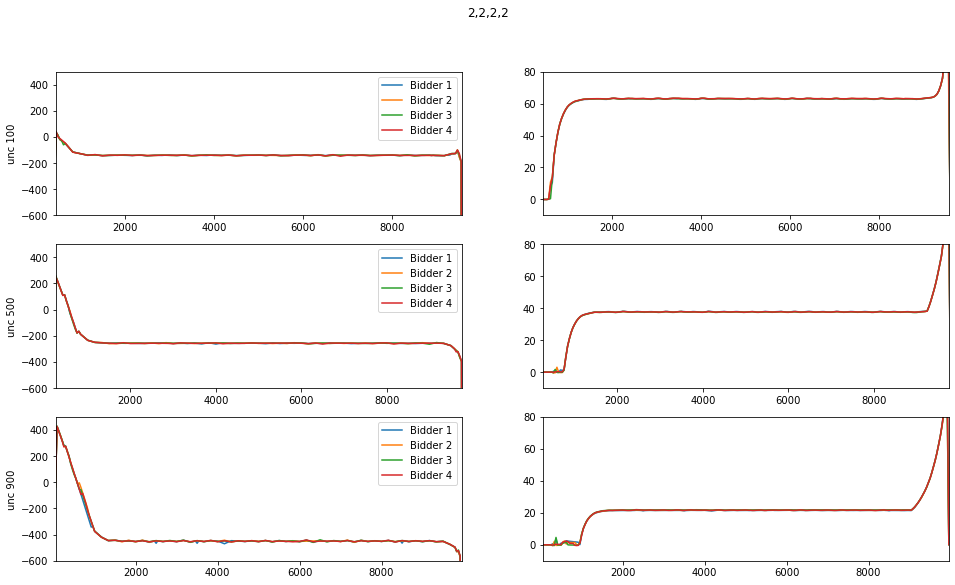

In [49]:
ryan.plot_exp_profit(mids, [100,500,900], bids[:,:,[6,30,54]], bid_profs[:,:,[6,30,54]], (2,2,2,2))

In [54]:
print(profs)
update_order = profs.argsort()
print(update_order)

[542571.35770055 541372.79799677 543751.71171613 544863.68308146]
[1 0 2 3]


Sort by lowest to highest profit. Why does lowest profit bidder best respond by going really low?  Should take highest bid that produces the max profit.

In [26]:
from pathos.multiprocessing import Pool
pool = Pool(6)

In [29]:
opt_bidders_set = bid_functions.BidderSet([bid_functions.Bidder(bidder_set.signals(), mids, uncs, bids[:,b,:].T) for b in range(len(bidder_set.bidders))])

In [55]:
opt_bids, opt_profs = zip(*map(lambda m: verify_bid_funcs.calc_best_resp_b_m_2(1, m, mids, uncs, sample_rel_mids, sample_uncs, bidder_set, n_samples, threshold = 0.02), range(len(mids))))


Best Response (1, 0.0)
Best Response (1, 41.666666666666664)
Best Response (1, 83.33333333333333)
Best Response (1, 125.0)
Best Response (1, 166.66666666666666)
Best Response (1, 208.33333333333331)
Best Response (1, 250.0)
Best Response (1, 291.66666666666663)
Best Response (1, 333.3333333333333)
Best Response (1, 375.0)
Best Response (1, 416.66666666666663)
Best Response (1, 458.3333333333333)
Best Response (1, 500.0)
Best Response (1, 541.6666666666666)
Best Response (1, 583.3333333333333)
Best Response (1, 625.0)
Best Response (1, 666.6666666666666)
Best Response (1, 708.3333333333333)
Best Response (1, 750.0)
Best Response (1, 791.6666666666666)
Best Response (1, 833.3333333333333)
Best Response (1, 875.0)
Best Response (1, 916.6666666666666)
Best Response (1, 958.3333333333333)
Best Response (1, 1000.0)
Best Response (1, 1041.6666666666665)
Best Response (1, 1083.3333333333333)
Best Response (1, 1125.0)
Best Response (1, 1166.6666666666665)
Best Response (1, 1208.3333333333333)
B

In [57]:
bids[:,1,6] - np.array(opt_bids)[:,6]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 41.12333333,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

# Should lowest exp profit be first mover?

Is the expected profit stable enough to use it to choose first mover or should it be random?

In [160]:
n_samples = 100000
mids = bidder_set.bidders[0].midpoints
uncs = bidder_set.bidders[0].uncertainties

orderings = []
for _ in range(1000):
    sample_rel_mids, sample_uncs = verify_bid_funcs.sample_rel_sufficient_stats(bidder_set.signals(), n_samples)
    bids, bid_profs = zip(*map(lambda m: verify_bid_funcs.calc_exp_prof_m(m, mids, uncs, sample_rel_mids, sample_uncs, bidder_set, n_samples), range(len(mids))))
    bids = np.array(bids)
    bid_profs = np.array(bid_profs)
    profs = np.array(bid_profs).sum(axis=0).sum(axis=1)
    orderings.append(profs.argsort())

0.0
41.666666666666664
83.33333333333333
125.0
166.66666666666666
208.33333333333331
250.0
291.66666666666663
333.3333333333333


KeyboardInterrupt: 

In [152]:

from matplotlib.animation import PillowWriter
import matplotlib.animation as animation

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
0


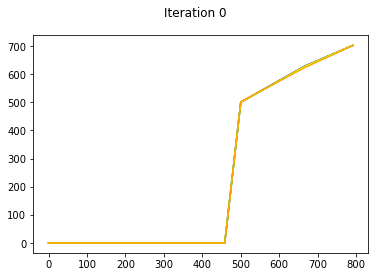

In [159]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors = ['blue','green','yellow','orange']
lines = []
for b_id in range(4):
    line, = ax.plot(mids[:20], bidder_iters.bid_sets[0][b_id][6][:20], color=colors[b_id])
    lines.append(line)

def plot_bid_func(iteration):
    print(iteration)
    fig.suptitle(f'Iteration {iteration}')
    for b_id in range(4):
        line = lines[b_id]
        new_data = bidder_iters.bid_sets[iteration][b_id][6][:20]
        line.set_data(mids[:20], new_data)

anim = animation.FuncAnimation(fig, plot_bid_func, frames=range(len(bidder_iters.bid_sets)), interval=500)
anim.save(f"test.gif", dpi=300, writer=PillowWriter(fps=1))


In [135]:
bids[16,1,6], np.array(opt_bids)[16,6]

(616.79, 575.6666666666665)

In [113]:
bids[14:19,1,5:8], np.array(opt_bids)[14:19,5:8]

(array([[556.71  , 553.715 , 558.74  ],
        [587.97  , 585.2525, 587.25  ],
        [619.23  , 616.79  , 615.76  ],
        [643.9425, 642.0675, 640.9125],
        [668.655 , 667.345 , 666.065 ]]),
 array([[525.45      , 522.1775    ],
        [556.71      , 553.715     ],
        [587.97      , 585.2525    ],
        [574.66666667, 575.66666667],
        [643.9425    , 642.0675    ],
        [668.655     , 667.345     ]]))

In [95]:
sample_rel_mids, sample_uncs = verify_bid_funcs.sample_rel_sufficient_stats(bidder_set.signals(), 1000000)

In [125]:
unc = uncs[6]
mid = mids[15]
lower = max(mid - unc/2, 500)
upper = min(mid + unc/2, 9500)
# Since true values are uniformly distributed, just make an evenly spread out array of them.
sample_trues = lower + (upper-lower)*np.linspace(0,1,1000000)
sample_mids = sample_rel_mids + sample_trues
sample_bids = verify_bid_funcs.convert_grid_bids(bidder_set, sample_mids, sample_uncs)

potential_bids = np.arange(min(mid+600, 9500), max(500,mid-800), -1)

In [129]:
other_highest = np.max(sample_bids[[0,1,2]], axis=0)

In [130]:
avgs = verify_bid_funcs.find_opt_bid(other_highest, sample_trues, potential_bids)

In [131]:
potential_bids[avgs.argmax()]

575.0

In [133]:
mid

625.0

(array([  1049.,   3325., 301444.,  56472.,  87142., 293159., 131725.,
         79585.,  38109.,   7990.]),
 array([512.85994231, 533.48453595, 554.10912959, 574.73372324,
        595.35831688, 615.98291052, 636.60750417, 657.23209781,
        677.85669145, 698.4812851 , 719.10587874]),
 <a list of 10 Patch objects>)

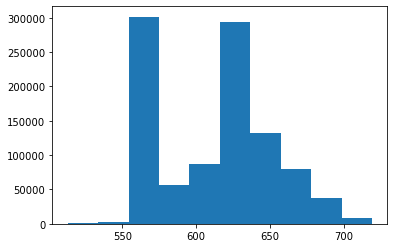

In [121]:
plt.hist(other_highest)

(array([   615.,  49857., 198137.,  69944., 269774., 154526., 129042.,
         80745.,  39760.,   7600.]),
 array([523.86262471, 546.69050524, 569.51838577, 592.3462663 ,
        615.17414683, 638.00202736, 660.82990789, 683.65778842,
        706.48566895, 729.31354948, 752.14143   ]),
 <a list of 10 Patch objects>)

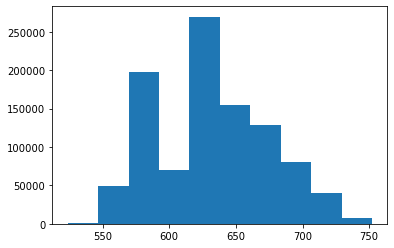

In [98]:
plt.hist(other_highest)

(array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.8000e+01, 1.5570e+03, 7.7420e+03],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         5.4000e+01, 2.3160e+03, 9.5430e+03, 1.7640e+04, 2.1697e+04],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.1900e+02, 3.3000e+03,
         1.1140e+04, 1.8794e+04, 2.1673e+04, 2.2094e+04, 2.1720e+04],
        [0.0000e+00, 4.4800e+02, 4.4330e+03, 1.2876e+04, 1.9574e+04,
         2.1701e+04, 2.1841e+04, 2.1608e+04, 2.1850e+04, 2.1736e+04],
        [4.9520e+03, 1.4510e+04, 2.0340e+04, 2.1753e+04, 2.1744e+04,
         2.1508e+04, 2.1921e+04, 2.1867e+04, 2.1556e+04, 2.1819e+04],
        [5.1600e+03, 1.4801e+04, 2.0486e+04, 2.2275e+04, 2.1840e+04,
         2.1675e+04, 2.1834e+04, 2.1825e+04, 2.2058e+04, 2.1610e+04],
        [0.0000e+00, 4.5300e+02, 4.6250e+03, 1.3195e+04, 1.9906e+04,
         2.1825e+04, 2.1841e+04, 2.1763e+04, 2.2007e+04, 2.1940e+04],
        [0.0000e+00, 0.0000

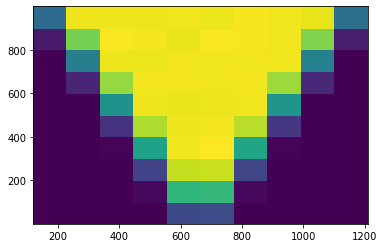

In [110]:
plt.hist2d(sample_mids[0,:], sample_uncs[0,:])

(array([ 10112.,  30212.,  49884.,  70579.,  89880., 109583., 129983.,
        149802., 170283., 189682.]),
 array([3.91347074e-01, 1.00352089e+02, 2.00312831e+02, 3.00273573e+02,
        4.00234314e+02, 5.00195056e+02, 6.00155798e+02, 7.00116540e+02,
        8.00077282e+02, 9.00038023e+02, 9.99998765e+02]),
 <a list of 10 Patch objects>)

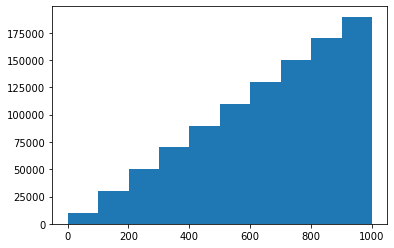

In [109]:
plt.hist(sample_uncs[0,:])

In [85]:
bids[16,:,6]

array([615.11, 616.79, 616.94, 619.7 ])

In [81]:
potential_bids[692], avgs[692]

(574.6666666666665, 17.979205742657445)

In [ ]:

            opt_bidders_set.bidders[b_id] = bid_functions.Bidder(signal_count[b_id], mids, uncs, np.array(opt_bids).T)
            #print(f'{np.array(opt_profs).shape}')
            profs[b_id] = np.array(opt_profs).sum()

        opt_bids, opt_profs = zip(*pool.map(lambda m: verify_bid_funcs.calc_exp_prof_m(m, mids, plot_uncs, sample_rel_mids, sample_uncs, opt_bidders_set, n_samples, max_uncertainty, value_bounds), range(len(mids))))
        

In [161]:
signal_count = (1,1,1,1)
file_name = f'F:/Dropbox (Chapman)/Costly Signals/sealed_bid_model/bid_funcs_{"".join([str(i) for i in signal_count])}.csv'
bidders_set = bid_functions.read_file(file_name)

In [164]:
max_uncertainty = 1000
value_bounds = (500, 9500)
n_bidders = len(signal_count)

n_mids = 61
mids = np.linspace(value_bounds[0] - max_uncertainty/2, value_bounds[1] + max_uncertainty/2, n_mids)

uncs = np.linspace(0, max_uncertainty, 2)

plot_uncs = [1000]

sample_rel_mids, sample_uncs = verify_bid_funcs.sample_rel_sufficient_stats(signal_count, n_samples, max_uncertainty)
pool = Pool(6)
bids, bid_profs = zip(*map(lambda m: verify_bid_funcs.calc_exp_prof_m(m, mids, uncs, sample_rel_mids, sample_uncs, bidders_set, n_samples, max_uncertainty, value_bounds), range(len(mids))))
bids = np.array(bids)

profs = np.array(bid_profs).sum(axis=0).sum(axis=1)

0.0
166.66666666666666
333.3333333333333
500.0
666.6666666666666
833.3333333333333
1000.0
1166.6666666666665
1333.3333333333333
1500.0
1666.6666666666665
1833.3333333333333
2000.0
2166.6666666666665
2333.333333333333
2500.0
2666.6666666666665
2833.333333333333
3000.0
3166.6666666666665
3333.333333333333
3500.0
3666.6666666666665
3833.333333333333
4000.0
4166.666666666666
4333.333333333333
4500.0
4666.666666666666
4833.333333333333
5000.0
5166.666666666666
5333.333333333333
5500.0
5666.666666666666
5833.333333333333
6000.0
6166.666666666666
6333.333333333333
6500.0
6666.666666666666
6833.333333333333
7000.0
7166.666666666666
7333.333333333333
7500.0
7666.666666666666
7833.333333333333
8000.0
8166.666666666666
8333.333333333332
8500.0
8666.666666666666
8833.333333333332
9000.0
9166.666666666666
9333.333333333332
9500.0
9666.666666666666
9833.333333333332
10000.0


In [166]:
opt_bidders_set = []
for b in range(n_bidders):
    if signal_count[b] == 1:
        opt_bidders_set.append(bid_functions.SingleSignalBidder(signal_count[b], mids, max_uncertainty, bids[:,b,-1]))
    else:
        opt_bidders_set.append(bid_functions.Bidder(signal_count[b], mids, uncs, bids[:,b,:].T))
opt_bidders_set = bid_functions.BidderSet(opt_bidders_set)

In [ ]:
opt_bids, opt_profs = zip(*map(lambda m: verify_bid_funcs.calc_best_resp_b_m_2(b_id, m, mids, uncs, sample_rel_mids, sample_uncs, opt_bidders_set, n_samples, max_uncertainty, value_bounds, 0.02), range(len(mids))))

In [ ]:
for b_id in profs.argsort():
    opt_bids, opt_profs = zip(*map(lambda m: verify_bid_funcs.calc_best_resp_b_m_2(b_id, m, mids, uncs, sample_rel_mids, sample_uncs, opt_bidders_set, n_samples, max_uncertainty, value_bounds, threshold), range(len(mids))))
    if signal_count[b_id] == 1:
        opt_bidders_set.bidders[b_id] = bid_functions.SingleSignalBidder(signal_count[b_id], mids, max_uncertainty, np.array(opt_bids)[-1])
    else:
        opt_bidders_set.bidders[b_id] = bid_functions.Bidder(signal_count[b_id], mids, uncs, np.array(opt_bids).T)
    #print(f'{np.array(opt_profs).shape}')
    profs[b_id] = np.array(opt_profs).sum()